## VaR using Monte Carlo Method

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
# Download data from YFinance
tickers = ['JPM', 'GS', 'BK', 'HSBC']
start_date = '2022-07-20'
end_date = '2025-07-20'

data = yf.download(tickers, start = start_date, end = end_date)['Close']
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


Ticker,BK,GS,HSBC,JPM
Date,,,,
2022-07-20,39.274818,296.998810,24.828732,105.947899
2022-07-21,39.593540,301.701630,25.141703,106.669388
2022-07-22,39.235348,299.290161,24.812683,106.151390
2022-07-25,39.510872,299.465729,25.542942,106.576881
2022-07-26,38.675102,294.319366,25.197874,104.911911
...,...,...,...,...
2025-07-14,95.250000,713.299988,62.509998,288.700012
2025-07-15,95.160004,702.510010,61.820000,286.549988
2025-07-16,95.489998,708.820007,62.540001,285.820007


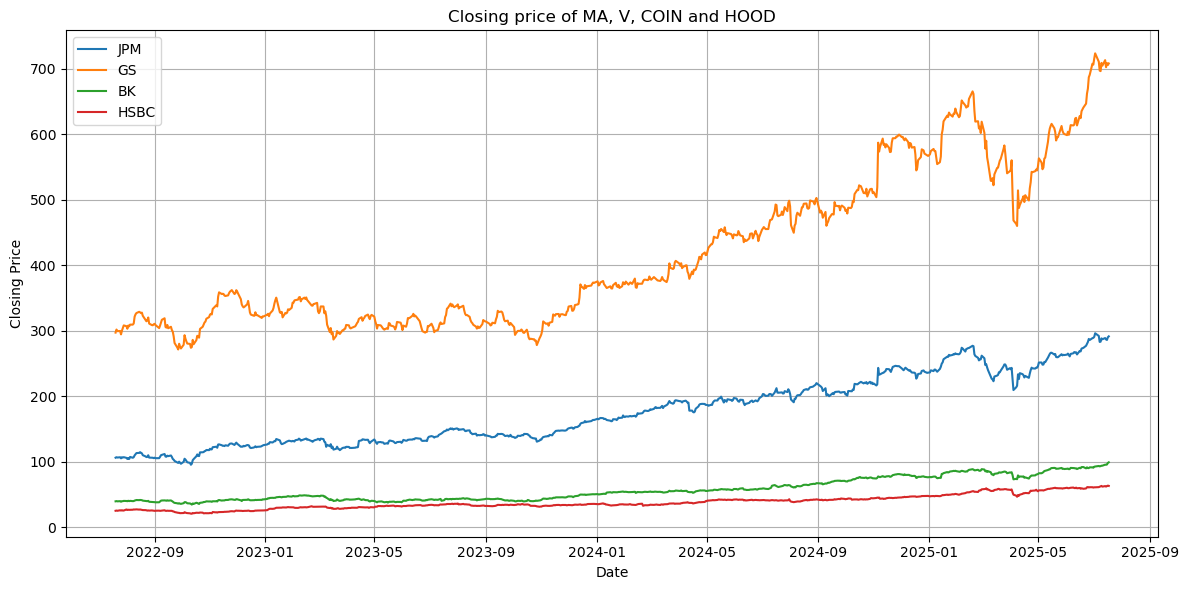

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[tickers], label=tickers)

# Title and labels
plt.title('Closing price of MA, V, COIN and HOOD')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [5]:
# Calculate returns
returns = data.pct_change()
returns

Ticker,BK,GS,HSBC,JPM
Date,,,,
2022-07-20,NaN,NaN,NaN,NaN
2022-07-21,0.008115,0.015834,0.012605,0.006810
2022-07-22,-0.009047,-0.007993,-0.013087,-0.004856
2022-07-25,0.007022,0.000587,0.029431,0.004008
2022-07-26,-0.021153,-0.017185,-0.013509,-0.015622
...,...,...,...,...
2025-07-14,0.016325,0.011845,0.012964,0.006414
2025-07-15,-0.000945,-0.015127,-0.011038,-0.007447
2025-07-16,0.003468,0.008982,0.011647,-0.002547


In [6]:
# Dropping null values
returns.dropna()

Ticker,BK,GS,HSBC,JPM
Date,,,,
2022-07-21,0.008115,0.015834,0.012605,0.006810
2022-07-22,-0.009047,-0.007993,-0.013087,-0.004856
2022-07-25,0.007022,0.000587,0.029431,0.004008
2022-07-26,-0.021153,-0.017185,-0.013509,-0.015622
2022-07-27,0.018286,0.018804,0.017516,0.016046
...,...,...,...,...
2025-07-14,0.016325,0.011845,0.012964,0.006414
2025-07-15,-0.000945,-0.015127,-0.011038,-0.007447
2025-07-16,0.003468,0.008982,0.011647,-0.002547


In [7]:
# Assigning weights
weights = np.array([0.3,0.3,0.2,0.2])
initial_portfolio_value = 1000000


In [8]:
m_returns = returns.mean()
m_returns

Ticker
BK      0.001341
GS      0.001307
HSBC    0.001351
JPM     0.001463
dtype: float64

In [9]:
cov_matrix = returns.cov()
cov_matrix

Ticker,BK,GS,HSBC,JPM
Ticker,,,,
BK,0.000223,0.000173,0.000107,0.000149
GS,0.000173,0.000301,0.000119,0.000202
HSBC,0.000107,0.000119,0.000227,0.000107
JPM,0.000149,0.000202,0.000107,0.000233


In [10]:
# Parmeters
confidence_level_99 = 0.99
confidence_level_95 = 0.95
confidence_level_90 = 0.90
n_simulations = 100000
time_horizon = 1 # 1 day

In [11]:
# Generating correlated returns using Cholesky
np.random.seed(42)
L = np.linalg.cholesky(cov_matrix)
Z = np.random.normal(size=(n_simulations, len(tickers)))
simulated_returns = np.dot(Z,L.T) + m_returns.values
simulated_returns

array([[ 0.00876695,  0.00526481,  0.01292567,  0.02051539],
       [-0.00215922, -0.00442931,  0.01951498,  0.00677294],
       [-0.00567717,  0.00289423, -0.00651188, -0.00451511],
       ...,
       [ 0.04059449,  0.02520455,  0.02074488,  0.02659838],
       [ 0.0040315 ,  0.01686442, -0.00118275,  0.0044025 ],
       [-0.03328767, -0.01473164, -0.00691132, -0.01669671]])

In [12]:
# Calculate simulated portfolio returns
portfolio_returns = np.dot(simulated_returns, weights)
portfolio_returns

array([ 0.01089774,  0.00328103, -0.00304028, ...,  0.02920836,
        0.00691273, -0.0191274 ])

In [13]:
# Calculate simulated portfolio values and losses
simulated_values = initial_portfolio_value*(1 + portfolio_returns)
simulated_values

array([1010897.74014683, 1003281.02547588,  996959.71944281, ...,
       1029208.3646061 , 1006912.72535445,  980872.59915986])

In [14]:
losses = initial_portfolio_value - simulated_values
losses

array([-10897.74014683,  -3281.02547588,   3040.28055719, ...,
       -29208.3646061 ,  -6912.72535445,  19127.40084014])

In [15]:
# Calculate VaR 
VaR_99 = np.percentile(losses, (1-confidence_level_99)*100)
VaR_95 = np.percentile(losses, (1-confidence_level_95)*100)
VaR_90 = np.percentile(losses, (1-confidence_level_90)*100)
print(VaR_99, VaR_95, VaR_90)

-32244.49904043661 -23106.624856342547 -18285.83522048394


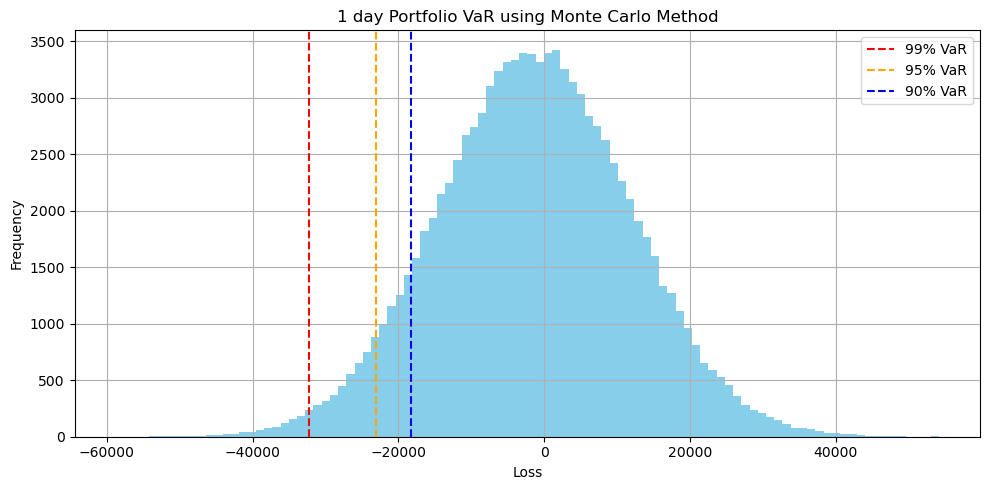

In [16]:
plt.figure(figsize = (10,5))
plt.hist(losses, bins = 100, color = 'skyblue')
plt.axvline(VaR_99, color = 'red', linestyle = '--', label = '99% VaR')
plt.axvline(VaR_95, color = 'orange', linestyle = '--', label = '95% VaR')
plt.axvline(VaR_90, color = 'blue', linestyle = '--', label = '90% VaR')
plt.title('1 day Portfolio VaR using Monte Carlo Method')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## VaR using Variance - Covariance Method

In [17]:
# adding a variable 'intermediate' to calculate weighted covariances in the portfolio
intermediate = np.dot(cov_matrix, weights)
portfolio_std = np.sqrt(np.dot(weights, intermediate))
portfolio_std

0.01320922184506754

In [18]:
from scipy.stats import norm

z_score_99 = norm.ppf(1-confidence_level_99)
z_score_95 = norm.ppf(1-confidence_level_95)
z_score_90 = norm.ppf(1-confidence_level_90)

In [19]:
VaR_99 = z_score_99*portfolio_std *initial_portfolio_value
VaR_95 = z_score_95*portfolio_std *initial_portfolio_value
VaR_90 = z_score_90*portfolio_std *initial_portfolio_value

In [20]:
VaR_99

-30729.245157006706

In [21]:
VaR_95

-21727.23646106596

In [22]:
VaR_90

-16928.29893517224

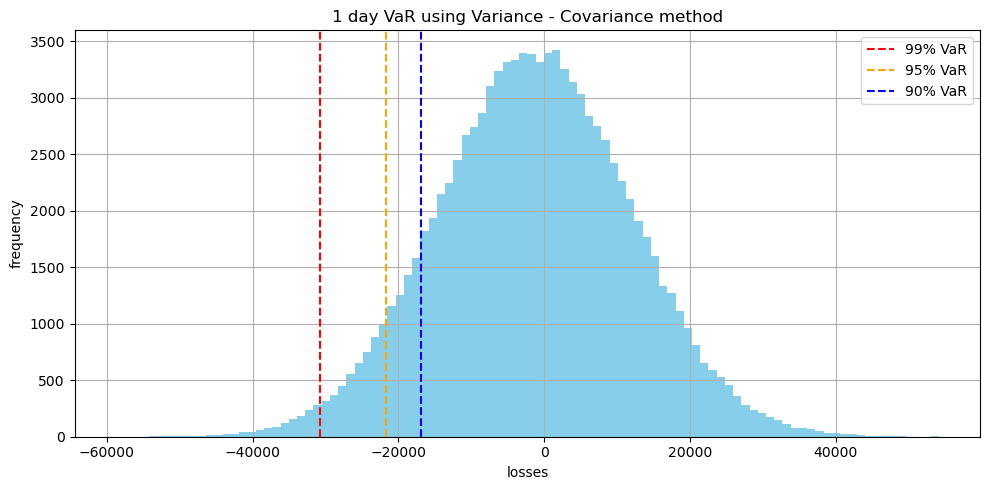

In [23]:
plt.figure(figsize = (10,5))
plt.hist(losses, bins = 100, color = 'skyblue')
plt.axvline(VaR_99, color = 'red', linestyle = '--', label = '99% VaR')
plt.axvline(VaR_95, color = 'orange', linestyle = '--', label = '95% VaR')
plt.axvline(VaR_90, color = 'blue', linestyle = '--', label = '90% VaR')
plt.title('1 day VaR using Variance - Covariance method')
plt.xlabel('losses')
plt.ylabel('frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()